In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('cars.csv')
#Medidas de dispersión

#Desviacion estandar
df["price_usd"].std()
print(f"Desviacion estandar",df["price_usd"].std())

#Rango = valor maximo - valor minimo
rango = df["price_usd"].max() - df["price_usd"].min()
print(f"rango", rango)

Desviacion estandar 6428.152018202915
rango 49999.0


In [38]:
#Quartiles
median = df["price_usd"].median() #mediana
Q1 = df["price_usd"].quantile(q=0.25)# q=0.25 es el primer quartil (25%)
Q3 = df["price_usd"].quantile(q=0.75)# q=0.75 es el tercer quartil (75%)
min_val = df["price_usd"].quantile(q=0) # q=0 es el minimo valor
max_val = df["price_usd"].quantile(q=1.0) # q=1.0 es el maximo valor
print("valormin:",min_val,"  Q1:", Q1,"  Mediana:", median,"  Q3:", Q3,"  ValorMax:", max_val) #minimo, primer quartil, mediana, tercer quartil, maximo

valormin: 1.0   Q1: 2100.0   Mediana: 4800.0   Q3: 8990.0   ValorMax: 50000.0


In [39]:
iqr = Q3 - Q1 #interquartil
print(iqr)

6890.0


Limites para la deteccion de outliers (datos simetricamente distribuidos)
Datos entre Q1 - 1.5 * IQR y Q3 + 1.5 * IQR

In [40]:
minlimit = Q1 -1.5*iqr #minimo valor del intervalo (1.5*iqr)
maxlimit = Q3 + 1.5*iqr #maximo valor  del intervalo (1.5*iqr)
print(minlimit, maxlimit) #minimo valor, maximo valor

-8235.0 19325.0


<AxesSubplot:xlabel='price_usd', ylabel='Count'>

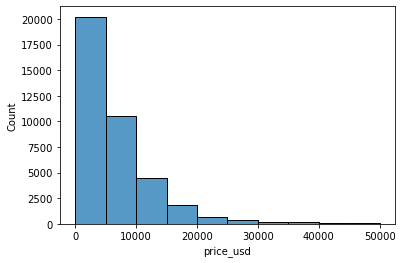

In [41]:
sns.histplot(df['price_usd'], bins=10) # plot

C:\Users\rexcu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_usd'>

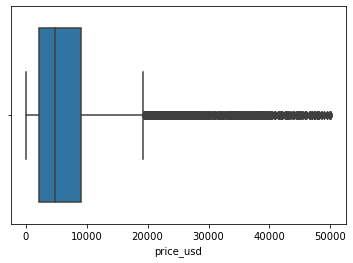

In [42]:
sns.boxplot(df['price_usd']) # plot

Text(0, 0.5, 'Precio en dolares')

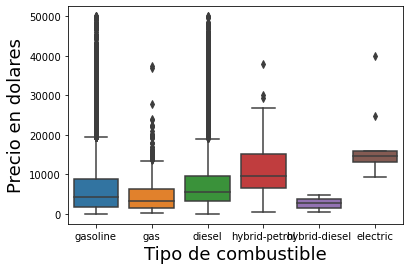

In [43]:
sns.boxplot(x ="engine_fuel", y= "price_usd", data = df ) # plot
plt.xlabel('Tipo de combustible', fontsize=18) # set xlabel
plt.ylabel('Precio en dolares', fontsize=18) # set xlabel

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


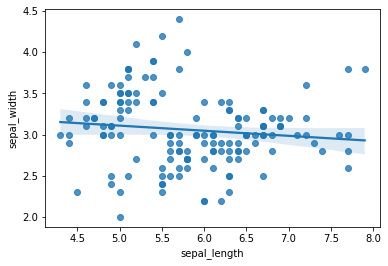

In [44]:
iris = sns.load_dataset('iris')

# use the function regplot to make a scatterplot
sns.regplot(x=iris["sepal_length"], y=iris["sepal_width"])
iris.head()

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

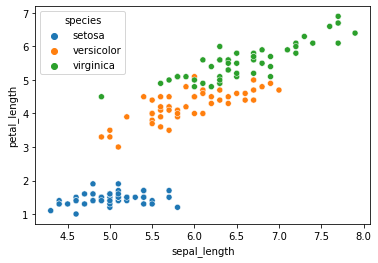

In [45]:
sns.scatterplot(data=iris, x = 'sepal_length', y = 'petal_length', hue='species')

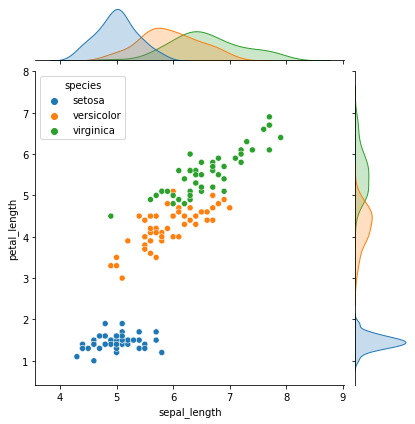

In [46]:
sns.jointplot(x='sepal_length', y='petal_length', data=iris, hue='species')

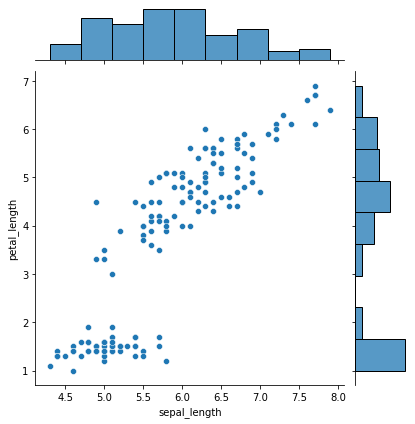

In [47]:
sns.jointplot(x='sepal_length', y='petal_length', data=iris)

<AxesSubplot:xlabel='species', ylabel='petal_length'>

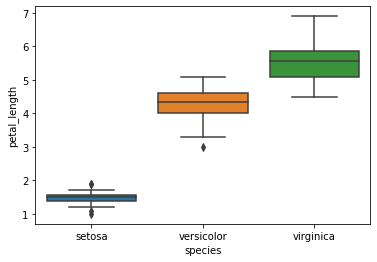

In [48]:
sns.boxplot(x='species', y='petal_length', data=iris)

<AxesSubplot:xlabel='species', ylabel='petal_length'>

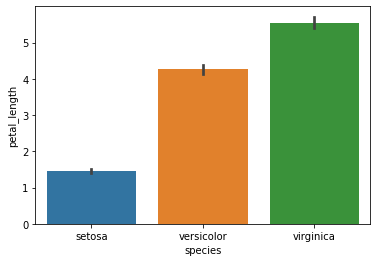

In [49]:
sns.barplot(x='species', y='petal_length', data=iris)

In [50]:
#Escalamiuento de datos numericos

#transformaciones lineales

import timeit
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

X, y = datasets.load_diabetes(return_X_y=True) # load diabetes datasets
raw = X[:, None, 2] #valor normalizado de la columna 2

(array([32., 66., 98., 90., 64., 50., 23., 12.,  5.,  2.]),
 array([-1.89792941, -1.34956464, -0.80119987, -0.2528351 ,  0.29552967,
         0.84389444,  1.39225921,  1.94062398,  2.48898875,  3.03735352,
         3.58571828]),
 <BarContainer object of 10 artists>)

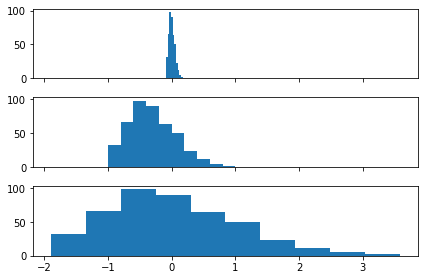

In [51]:
#relglas de escalamiento    
max_raw = max(raw)
min_raw = min(raw)
scaled = (2*raw - max_raw - min_raw)/(max_raw - min_raw) #escalado

#normalizacion z-score

avg = np.average(raw) #promedio
std = np.std(raw) #desviacion estandar
z_scaled = (raw - avg)/std

fig, axs = plt.subplots(3, 1, sharex=True, tight_layout=True) # crea 3 subplots

axs[0].hist(raw)
axs[1].hist(scaled)
axs[2].hist(z_scaled)


In [52]:
#modelos para entrenamiento
def train_raw():
    linear_model.LinearRegression().fit(raw, y) #tiempos de entrenamiento
def train_scaled():
    linear_model.LinearRegression().fit(scaled, y) #tiempos de entrenamiento
def train_z_scaled():
    linear_model.LinearRegression().fit(z_scaled, y) #tiempos de entrenamiento


In [53]:
raw_time = timeit.timeit(train_raw, number = 100) #tiempo de entrenamiento
scaled_time = timeit.timeit(train_scaled, number = 100)
z_scaled_time = timeit.timeit(train_z_scaled, number = 100)

print(f'train raw : {raw_time} ')
print(f'train scaled : {scaled_time}')
print(f'train z_scaled : {z_scaled_time}')

train raw : 0.08823321199997736 
train scaled : 0.056005163000008906
train z_scaled : 0.15276997500041034


<AxesSubplot:>

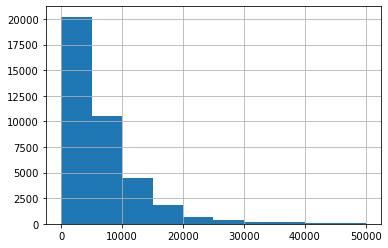

In [56]:
df.price_usd.hist()

<AxesSubplot:>

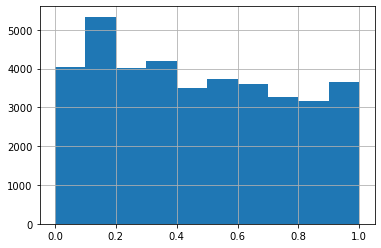

In [57]:
#transformacion con tanh(x)
p=10000
df.price_usd.apply(lambda x: np.tanh(x/p)).hist()